## Final Project Submission


* Student name: Asad Rahman
* Student pace: full time
* Scheduled project review date/time: July 18th, 2019
* Instructor name: Victor Geislinger


### Business Case

Create a neural network that can examine X-Ray images to detect Pneumonia quickly and effectivly. Our dataset comes from the cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center. All chest xrays were first identified and marked by a physician.

###### Import the libraries

We start by importing some of the packages and modules that we intend to use.

In [1]:
import os, shutil
import time
import matplotlib.pyplot as plt
import scipy
import numpy as np
from PIL import Image
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

np.random.seed(123)

Using TensorFlow backend.


######  Loading the Images

The original dataset is from kaggle. The images are that of xray images for pneumonia, which we will be creating a model to distinguish healthy and infected cases. The images were downloaded from https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia.

In [2]:
train_folder = "chest_xray/train"
train_pneumonia = "chest_xray/train/PNEUMONIA"
train_normal = "chest_xray/train/NORMAL"

test_folder = "chest_xray/test"
test_pneumonia = "chest_xray/test/PNEUMONIA"
test_normal = "chest_xray/test/NORMAL"

val_folder = "chest_xray/val"
val_pneumonia = "chest_xray/val/PNEUMONIA"
val_normal = "chest_xray/val/NORMAL"

In [43]:
train_p = len(os.listdir(train_pneumonia))
print("There are", train_p, "pneumonia images in the training set")

There are 3876 pneumonia images in the training set


In [44]:
val_p = len(os.listdir(val_pneumonia))
print("There are", val_p, "pneumonia images in the validation set")

There are 9 pneumonia images in the validation set


In [45]:
test_p = len(os.listdir(test_pneumonia))
print('There are', test_p, 'pneumonia images in the test set')

There are 390 pneumonia images in the test set


In [46]:
train_n = len(os.listdir(train_normal))
print('There are', train_n, 'images without pneumonia in the train set')

There are 1342 images without pneumonia in the train set


In [47]:
val_n = len(os.listdir(val_normal))
print('There are', val_n, 'images without pneumonia in the validation set')

There are 9 images without pneumonia in the validation set


In [48]:
test_n = len(os.listdir(test_normal))
print('There are', test_n, 'images without pneumonia in the test set')

There are 234 images without pneumonia in the test set


Here we can visualize the total data we have for both infected and uninfected patients

<BarContainer object of 2 artists>

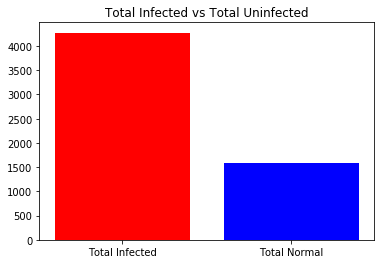

In [56]:
total_p = train_p + val_p + test_p
total_n = train_n + val_n + test_n
plt.title("Total Infected vs Total Uninfected")
plt.bar(["Total Infected", "Total Normal"], [total_p,total_n], color = ["r","b"])

We sort our images properly, reducing the image size to 150x150 to be more easily testable

In [9]:
# get all the data in the directory /test (624 images), and reshape them
test_generator = ImageDataGenerator(rescale=1./255,horizontal_flip=True).flow_from_directory(
        test_folder, 
        target_size=(150, 150), batch_size = 624) 

# get all the data in the directory /validation (18 images), and reshape them
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_folder, 
        target_size=(150, 150), batch_size = 18)

# get all the data in the directory /train (5218 images), and reshape them
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_folder, 
        target_size=(150, 150), batch_size=5218)

Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 5216 images belonging to 2 classes.


In [10]:
# create the data sets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

In [11]:
# Explore your dataset again
m_train = train_images.shape[0]
num_px = train_images.shape[1]
m_test = test_images.shape[0]
m_val = val_images.shape[0]

print ("Number of training samples: " + str(m_train))
print ("Number of testing samples: " + str(m_test))
print ("Number of validation samples: " + str(m_val))
print ("train_images shape: " + str(train_images.shape))
print ("train_labels shape: " + str(train_labels.shape))
print ("test_images shape: " + str(test_images.shape))
print ("test_labels shape: " + str(test_labels.shape))
print ("val_images shape: " + str(val_images.shape))
print ("val_labels shape: " + str(val_labels.shape))

Number of training samples: 5216
Number of testing samples: 624
Number of validation samples: 16
train_images shape: (5216, 150, 150, 3)
train_labels shape: (5216, 2)
test_images shape: (624, 150, 150, 3)
test_labels shape: (624, 2)
val_images shape: (16, 150, 150, 3)
val_labels shape: (16, 2)


In [12]:
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)
val_img = val_images.reshape(val_images.shape[0], -1)

print(train_img.shape)
print(test_img.shape)
print(val_img.shape)

(5216, 67500)
(624, 67500)
(16, 67500)


In [13]:
train_y = np.reshape(train_labels[:,0], (5216,1))
test_y = np.reshape(test_labels[:,0], (624,1))
val_y = np.reshape(val_labels[:,0], (16,1))

###### Creating the Model

Using Keras, we built a fully connected (Dense) layer network with relu activations

We used 50 units in the first layer, 25 in the second layer, 12 in the third, all with relu activations.

Our model was iterativley created, although not saved in the notebook. This was one of the more effective parameters used.

In [14]:
from keras import models
from keras import layers
from keras import optimizers
np.random.seed(123)
model = models.Sequential()
model.add(layers.Dense(50, activation='relu', input_shape=(67500,))) #2 hidden layers
model.add(layers.Dense(25, activation='relu'))
model.add(layers.Dense(12, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

###### Compile and train the Model

In the compiler, we passed an optimizer, loss function, and metrics. We trained the model for 100 epochs in mini-batches of 32 samples.

We also introduce our validation data to the model when we train it.

In [15]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model1 = model.fit(train_img,
                    train_y,
                    epochs=100,
                    batch_size=32,
                    validation_data=(val_img, val_y))

Train on 5216 samples, validate on 16 samples
Epoch 1/100
5216/5216 [==============================] - 9s 2ms/step - loss: 0.4777 - acc: 0.7736 - val_loss: 1.5580 - val_acc: 0.5000
Epoch 2/100
5216/5216 [==============================] - 9s 2ms/step - loss: 0.3251 - acc: 0.8614 - val_loss: 0.6540 - val_acc: 0.6875
Epoch 3/100
5216/5216 [==============================] - 9s 2ms/step - loss: 0.2517 - acc: 0.8997 - val_loss: 0.4102 - val_acc: 0.7500
Epoch 4/100
5216/5216 [==============================] - 9s 2ms/step - loss: 0.2112 - acc: 0.9168 - val_loss: 0.8934 - val_acc: 0.6875
Epoch 5/100
5216/5216 [==============================] - 9s 2ms/step - loss: 0.1917 - acc: 0.9266 - val_loss: 0.5098 - val_acc: 0.8125
Epoch 6/100
5216/5216 [==============================] - 9s 2ms/step - loss: 0.1785 - acc: 0.9306 - val_loss: 0.4439 - val_acc: 0.8125
Epoch 7/100
5216/5216 [==============================] - 9s 2ms/step - loss: 0.1632 - acc: 0.9344 - val_loss: 0.7288 - val_acc: 0.6875
Epoch 8/1

In [16]:
results_train = model.evaluate(train_img, train_y)

5216/5216 [==============================] - 3s 574us/step


In [17]:
results_test = model.evaluate(test_img, test_y)

624/624 [==============================] - 0s 646us/step


In [18]:
results_train

[0.03637136528025627, 0.9861963190184049]

In [19]:
results_test

[1.2526295215655596, 0.7451923076923077]

We're able to achieve 98% accuracy on our train data, and 76% on our test data.

##### Plotting the Results

We plotted the training and validation loss in one plot

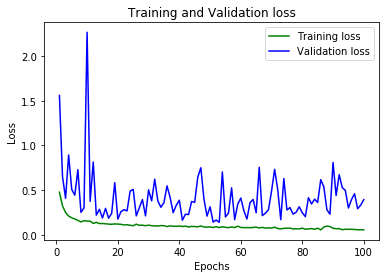

In [20]:
plt.clf()

import matplotlib.pyplot as plt
model_val_dict = model1.history
loss_values = model_val_dict["loss"]
val_loss_values= model_val_dict["val_loss"]

epochs = range(1,len(loss_values) + 1)
plt.plot(epochs, loss_values, "g", label="Training loss")
plt.plot(epochs, val_loss_values, "blue", label="Validation loss")

plt.title("Training and Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Here we plot the training accurary with the validation accuracy

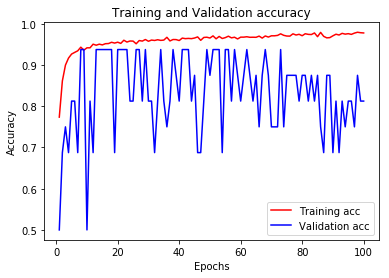

In [21]:
plt.clf()

acc_values = model_val_dict["acc"]
val_acc_values = model_val_dict["val_acc"]

plt.plot(epochs, acc_values, "r", label="Training acc")
plt.plot(epochs, val_acc_values, "blue", label="Validation acc")

plt.title("Training and Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

We see some signs of overfitting and testing accuracy at about 74%, although our training accuracy is fairly high. We can do better.

###### Convolution Operation

Here we introduced our convolutional neural network. The convolution step function Conv2d and pooling function are used, as well as additional dropout layers.

In [22]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150 ,150,  3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(1 , activation='sigmoid'))

model.compile(loss='binary_crossentropy',
                  optimizer=optimizers.RMSprop(lr=1e-4),
                  metrics=['accuracy'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36992)             0         
__________

In [23]:
history = model.fit(train_images,
                    train_y,
                    epochs=6,
                    batch_size=256,
                    validation_data=(val_images, val_y))

Train on 5216 samples, validate on 16 samples
Epoch 1/6
5216/5216 [==============================] - 269s 52ms/step - loss: 0.5488 - acc: 0.7525 - val_loss: 1.3615 - val_acc: 0.5000
Epoch 2/6
5216/5216 [==============================] - 259s 50ms/step - loss: 0.3571 - acc: 0.8606 - val_loss: 0.6840 - val_acc: 0.6250
Epoch 3/6
5216/5216 [==============================] - 270s 52ms/step - loss: 0.2420 - acc: 0.9059 - val_loss: 1.1236 - val_acc: 0.6250
Epoch 4/6
5216/5216 [==============================] - 267s 51ms/step - loss: 0.1912 - acc: 0.9260 - val_loss: 0.7345 - val_acc: 0.6875
Epoch 5/6
5216/5216 [==============================] - 263s 50ms/step - loss: 0.1559 - acc: 0.9404 - val_loss: 0.5777 - val_acc: 0.7500
Epoch 6/6
5216/5216 [==============================] - 254s 49ms/step - loss: 0.1524 - acc: 0.9425 - val_loss: 0.4021 - val_acc: 0.7500


In [24]:
results_train = model.evaluate(train_images, train_y)

5216/5216 [==============================] - 93s 18ms/step


In [25]:
results_test = model.evaluate(test_images, test_y)

624/624 [==============================] - 12s 20ms/step


In [26]:
results_train

[0.2263127857464954, 0.9081671779141104]

In [27]:
results_test

[0.4445914022433452, 0.8141025641025641]

90% train data and 81% test data

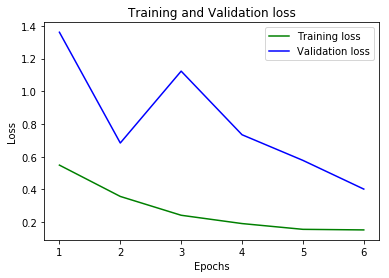

In [28]:
plt.clf()

import matplotlib.pyplot as plt
model2_val_dict = history.history
loss_values2 = model2_val_dict["loss"]
val_loss_values2= model2_val_dict["val_loss"]

epochs = range(1,len(loss_values2) + 1)
plt.plot(epochs, loss_values2, "g", label="Training loss")
plt.plot(epochs, val_loss_values2, "blue", label="Validation loss")

plt.title("Training and Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

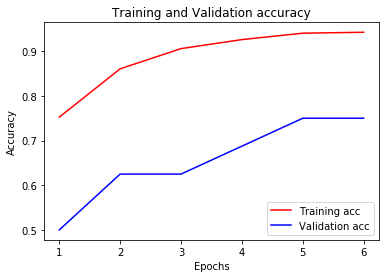

In [29]:
plt.clf()

acc_values2 = model2_val_dict["acc"]
val_acc_values2 = model2_val_dict["val_acc"]

plt.plot(epochs, acc_values2, "r", label="Training acc")
plt.plot(epochs, val_acc_values2, "blue", label="Validation acc")

plt.title("Training and Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

At the cost of having reduced training accuracy, our testing accuracy increased. We also have a reduced difference between training and validation loss, showing less signs of overfitting

## Visualizing Intermediate Activations

Below we begin to visualize the hidden layers within the CNN to see the sorts of features that our deep network is uncovering through various filters. This shows us what our network is seeing.

In [30]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36992)             0         
__________

(1, 150, 150, 3)


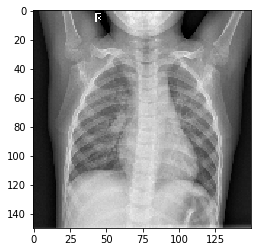

In [57]:
from keras.preprocessing import image

img_path = 'chest_xray/train/NORMAL/IM-0115-0001.jpeg'


img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)

#Follow the Original Model Preprocessing
img_tensor /= 255.

#Check tensor shape
print(img_tensor.shape)

#Preview an image
plt.imshow(img_tensor[0])
plt.show()

In [58]:
# Extract model layer outputs
layer_outputs = [layer.output for layer in model.layers[:8]]

# Rather then a model with a single output, we are going to make a model to display the feature maps
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

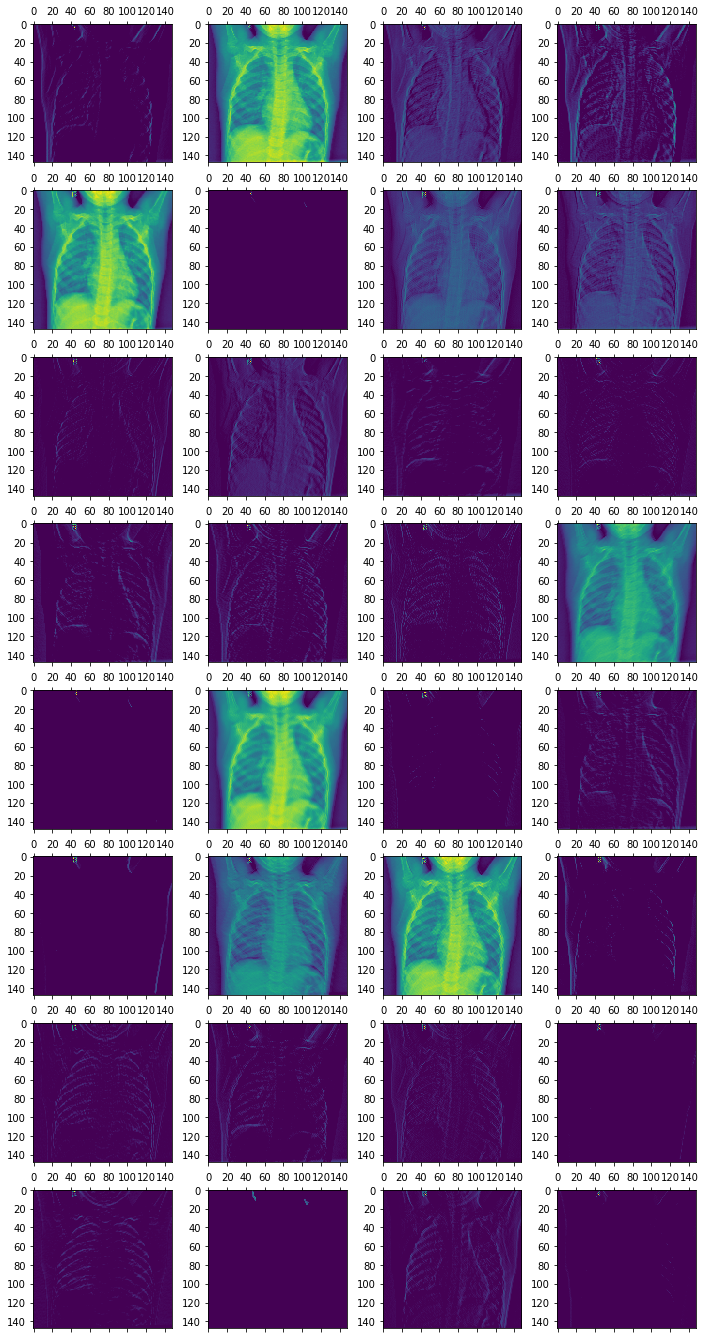

In [62]:
fig, axes = plt.subplots(8, 4, figsize=(12,24))
for i in range(32):
    row = i//4
    column = i%4
    ax = axes[row, column]
    first_layer_activation = activations[0]
    ax.matshow(first_layer_activation[0, :, :, i], cmap='viridis')

## Conclusion

Although our first iteration (baseline: neural network) was able to get a higher training accuracy to our dataset, the model seemed to be overfitting to our data and only yielded a testing accuracy of 74%.

Our second model, although training accuracy drastically decreased - the increase from 74% to 80% in training accuracy is substantially in correctly identifying smaller patterns critical in identifying pneumonia. We also assessed less overfitting to our dataset, which makes the use of the model more available to general use cases.

In a real world scenario, these models wouldnt be best implemented in its current state. It would be on the hospital to determine if the potential of inaccuracy and possibility of a false positive is worth the effeciency per patient. Considering the severity of pneumonia, having an individual physician determine the diagnosis would be better suited currently. 

Once a greater accuracy is obtained through optimizations, transfer learning can be used to expand the detection of disease from pneumonia to other more time sensitive diagnosis. Also efficiency of the model would increase if a singular model could identify more than one disease.

### Future Improvements

Due to the time constraint of the project, future iterations could yield greater testing results through increased epochs. Also, imploying regularization and optimization techniques such as L1 or L2 regularization should be recorded as attempted improvements to the network. Lastly, increasing the dataset or varying the number of training and validation sets could change the network accuracy.